In [74]:
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory

In [75]:
with zipfile.ZipFile('SMILEs.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [76]:
# Eliminar la carpeta __MACOSX si existe
macosx_dir = '__MACOSX'
if os.path.exists(macosx_dir):
    shutil.rmtree(macosx_dir)
    print("Carpeta __MACOSX eliminada")

Carpeta __MACOSX eliminada


In [77]:
set_training = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300, 300),
    batch_size=32,
    shuffle=True,
    label_mode="binary"
)

Found 13165 files belonging to 2 classes.
Using 10532 files for training.


In [78]:
set_validation = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(300, 300),
    batch_size=32,
    shuffle=True,
    label_mode="binary"
)

Found 13165 files belonging to 2 classes.
Using 2633 files for validation.


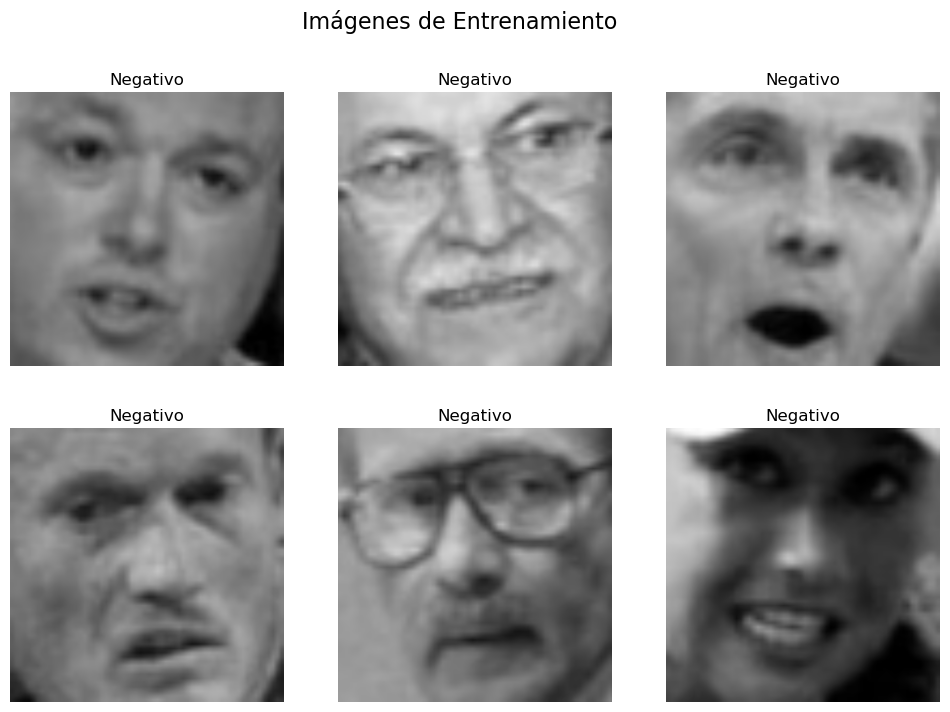

In [79]:
plt.figure(figsize=(12, 8))
plt.suptitle("Imágenes de Entrenamiento", size=16)
for images, labels in set_training.take(1):
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Positivo' if labels[i] == 1 else 'Negativo')
        plt.axis('off')
plt.show()

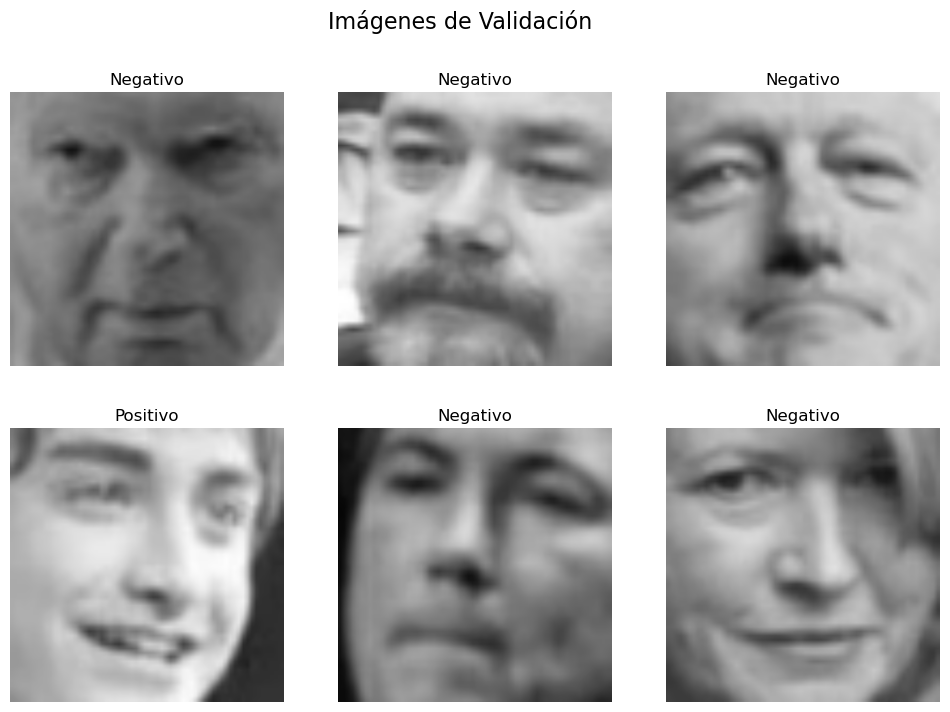

In [80]:
plt.figure(figsize=(12, 8))
plt.suptitle("Imágenes de Validación", size=16)
for images, labels in set_validation.take(1):
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Positivo' if labels[i] == 1 else 'Negativo')
        plt.axis('off')
plt.show()

## EJERCICIO

In [5]:
import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

In [6]:
with zipfile.ZipFile('SMILEs.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [7]:
macosx_dir = '__MACOSX'
if os.path.exists(macosx_dir):
    shutil.rmtree(macosx_dir)
    print("MacOSX directory removed")

MacOSX directory removed


In [8]:
base_dir = 'SMILEs'
test_dir = 'test_images'
os.makedirs(test_dir, exist_ok=True)

In [21]:
for label in ['positives7', 'negatives7']:
    src_dir = os.path.join(base_dir, label)
    files = os.listdir(src_dir)[:3]  # Take first 3 images
    for file in files:
        shutil.copy2(
            os.path.join(src_dir, file),
            os.path.join(test_dir, f"{label}_{file}")
        )

In [23]:
train_ds = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300, 300),
    batch_size=32,
    shuffle=True,
    label_mode="binary"
)

Found 13165 files belonging to 2 classes.
Using 10532 files for training.


In [25]:
val_ds = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(300, 300),
    batch_size=32,
    shuffle=True,
    label_mode="binary"
)

Found 13165 files belonging to 2 classes.
Using 2633 files for validation.


In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=0
)

In [ ]:
test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(300, 300),
    batch_size=6,
    shuffle=False
)

In [ ]:
test_images = next(iter(test_ds))[0]
predictions = model.predict(test_images)

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Test Images with Predictions", size=16)
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i].numpy().astype("uint8"))
    pred = predictions[i][0]
    plt.title(f'Prediction: {"Smile" if pred > 0.5 else "No Smile"}\n({pred:.2f})')
    plt.axis('off')
plt.show()